In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import linear_model, metrics
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neural_network import BernoulliRBM
from sklearn.pipeline import Pipeline
from sklearn.base import clone

In [2]:
df = pd.read_csv('data/mnist.csv')
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
df.shape

(42000, 785)

In [4]:
X = df.iloc[:, 1:]
y = df.iloc[:, 0]

In [5]:
X.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
y.head()

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64

In [7]:
def display_image(index):
    print(f'Digit: {y[index]}')
    plt.imshow(X.iloc[index].values.reshape(28, 28), cmap='gray')

Digit: 1


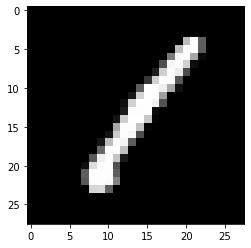

In [8]:
display_image(0)

Digit: 3


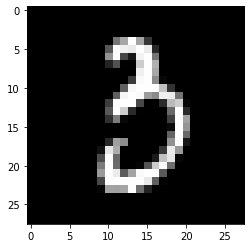

In [9]:
display_image(150)

In [10]:
X = np.asarray(X)
X = X.astype('float32')/255.0

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
log_reg = linear_model.LogisticRegression(solver='lbfgs', max_iter=1000, multi_class='multinomial')
log_reg.fit(X_train, y_train)
print(f'Training set score: {log_reg.score(X_train, y_train)}')
print(f'Test set score: {log_reg.score(X_test, y_test)}')

Training set score: 0.9463095238095238
Test set score: 0.9189285714285714


In [13]:
rbm = BernoulliRBM(verbose=True)
log_reg = linear_model.LogisticRegression(solver='lbfgs', max_iter=1000, multi_class='multinomial')
rbm_features_classifier = Pipeline(steps=[('rbm', rbm), ('logistic', log_reg)])
rbm.learning_rate = 0.06
log_reg.C = 0.1

In [15]:
param_grid = [{
    'rbm__n_components': [50, 100, 150],
    'rbm__n_iter': [20, 40, 60],
}]
grid_search = GridSearchCV(rbm_features_classifier, param_grid, cv=2, n_jobs=-1)
grid_search.fit(X_train, y_train)
print(f'Best score: {grid_search.best_score_}')
print(f'Best parameters: {grid_search.best_params_}')

[BernoulliRBM] Iteration 1, pseudo-likelihood = -93.25, time = 3.22s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -87.71, time = 3.96s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -86.07, time = 4.08s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -81.35, time = 3.93s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -81.88, time = 3.90s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -85.56, time = 3.91s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -83.90, time = 3.92s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -84.45, time = 3.90s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -84.28, time = 4.16s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -81.47, time = 3.99s
[BernoulliRBM] Iteration 11, pseudo-likelihood = -80.67, time = 4.15s
[BernoulliRBM] Iteration 12, pseudo-likelihood = -78.02, time = 3.94s
[BernoulliRBM] Iteration 13, pseudo-likelihood = -81.23, time = 3.85s
[BernoulliRBM] Iteration 14, pseudo-likelihood = -80.89, time = 4.07s
[BernoulliRBM] Iteration 15, 